<a href="https://colab.research.google.com/github/QingfangLiu/DS_learning/blob/main/umap_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

code from https://medium.com/data-science-at-microsoft/charting-the-curves-decoding-non-linear-separability-in-ai-fcb57a00335e

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

import warnings
warnings.filterwarnings("ignore")

import umap
from scipy.spatial.distance import pdist

In [ ]:
# Step 1: Generate a synthetic non-linearly separable dataset (make_circles)
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5)

In [ ]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


In [ ]:
# Step 2: Standardize the dataset (important for UMAP)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply UMAP for dimensionality reduction to 2D
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_model.fit_transform(X_scaled)

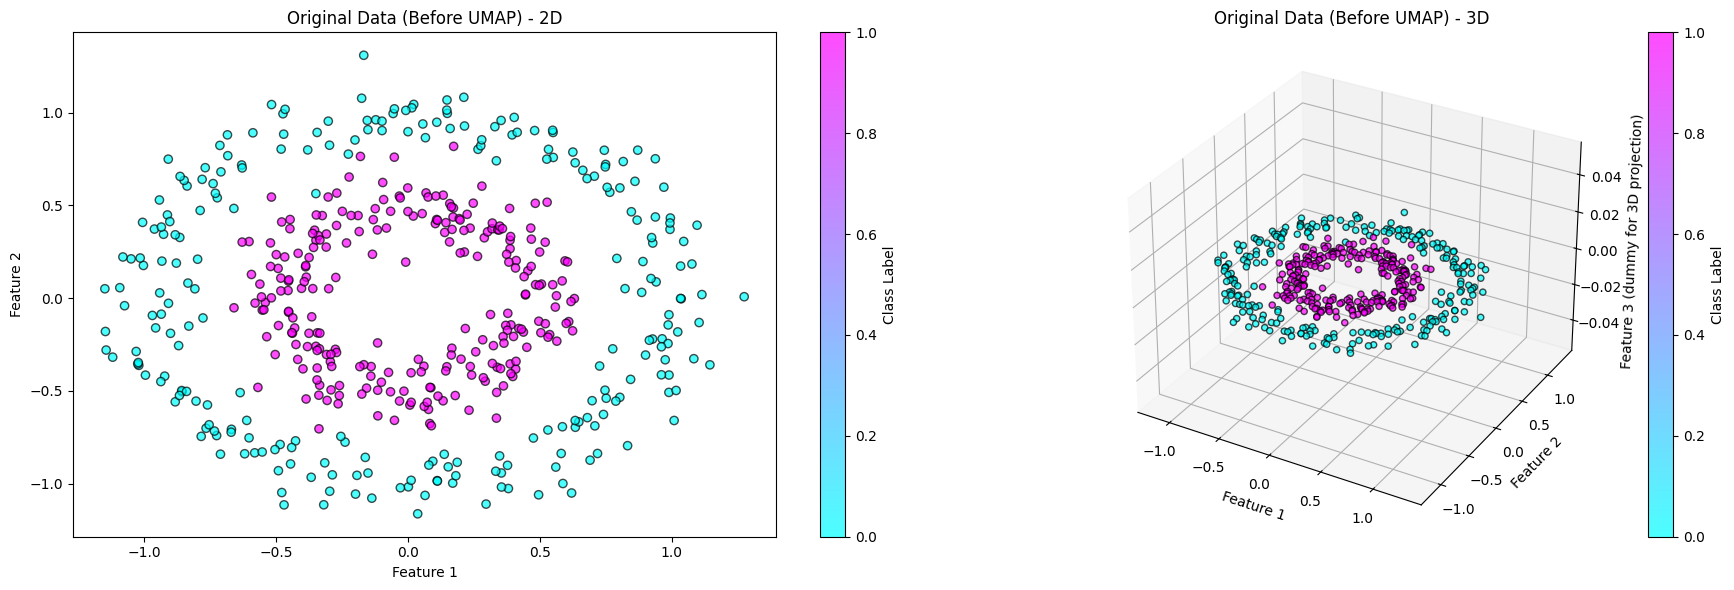

In [ ]:
# Step 4: Visualize the original dataset in both 2D and 3D
fig = plt.figure(figsize=(18, 6))

# Plot the original data points in 2D
ax1 = fig.add_subplot(1, 2, 1)
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='cool', edgecolor='k', alpha=0.7)
ax1.set_title("Original Data (Before UMAP) - 2D")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
fig.colorbar(scatter1, ax=ax1, label='Class Label')

# Plot the original data points in 3D
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter2 = ax2.scatter(X[:, 0], X[:, 1], np.zeros_like(X[:, 0]), c=y, cmap='cool', edgecolor='k', alpha=0.7)
ax2.set_title("Original Data (Before UMAP) - 3D")
ax2.set_xlabel("Feature 1")
ax2.set_ylabel("Feature 2")
ax2.set_zlabel("Feature 3 (dummy for 3D projection)")
fig.colorbar(scatter2, ax=ax2, label='Class Label')

plt.tight_layout()
plt.show()